In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [2]:
#data collection

In [3]:
df=pd.read_csv(r"C:\Users\laksh\OneDrive\Desktop\dataset\dataset\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
X=df.drop(columns='Outcome',axis=1)
Y=df['Outcome']

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [11]:
#data standardization
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [12]:
standardized_data = scaler.transform(X)
print(standardized_data)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [13]:
X=standardized_data
Y=df['Outcome']
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [14]:
#train test split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [16]:
#Support vector machine
#train the model
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train, Y_train)
svm_training_prediction=svm.predict(X_train)
acc=accuracy_score(Y_train,svm_training_prediction)

print("Accuracy score:",round(np.mean(acc)*100,2))

Accuracy score: 78.66


Precision score of training set: 0.7455621301775148
Recall score of training set: 0.5887850467289719
F1 score of training set: 0.6579634464751958


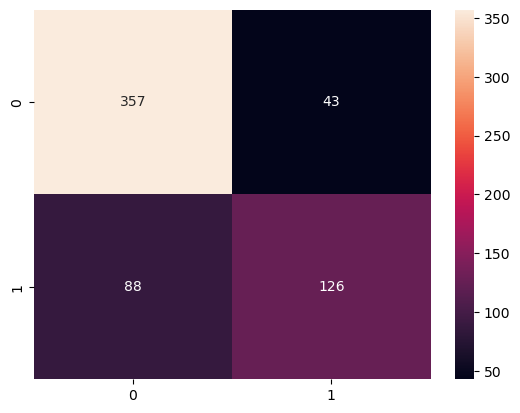

In [17]:
#training data accuracy

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
con = confusion_matrix(Y_train, svm_training_prediction)
sns.heatmap(con, annot=True, fmt='d')
print("Precision score of training set:",precision_score(Y_train, svm_training_prediction))
print("Recall score of training set:",recall_score(Y_train, svm_training_prediction))
print("F1 score of training set:",f1_score(Y_train, svm_training_prediction))

In [18]:
#test model 

from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_test, Y_test)
svm_testing_prediction = svm.predict(X_test)
acc=accuracy_score(Y_test, svm_testing_prediction)
print("Accuracy score of testing set:", round(np.mean(acc)*100, 2))

Accuracy score of testing set: 75.32


Precision score of testing set: 0.6818181818181818
Recall score of testing set: 0.5555555555555556
F1 score of testing set: 0.6122448979591837


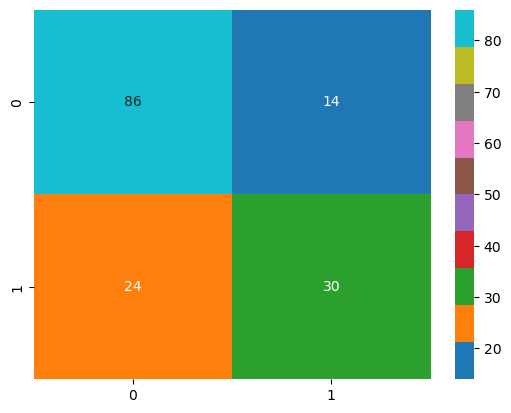

In [19]:
#test data accuracy 

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
con = confusion_matrix(Y_test, svm_testing_prediction)
sns.heatmap(con, annot=True, fmt='d', cmap="tab10")
print("Precision score of testing set:",precision_score(Y_test, svm_testing_prediction))
print("Recall score of testing set:",recall_score(Y_test, svm_testing_prediction))
print("F1 score of testing set:",f1_score(Y_test, svm_testing_prediction))

In [20]:
#logistic regression
#train the model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
train_prediction = lr.predict(X_train)
acc = accuracy_score(Y_train, train_prediction)
print("Accuracy score of training set:", round(np.mean(acc)*100, 2))


Accuracy score of training set: 78.5


Precision score of training set: 0.7469879518072289
Recall score of training set: 0.5794392523364486
F1 score of training set: 0.6526315789473685


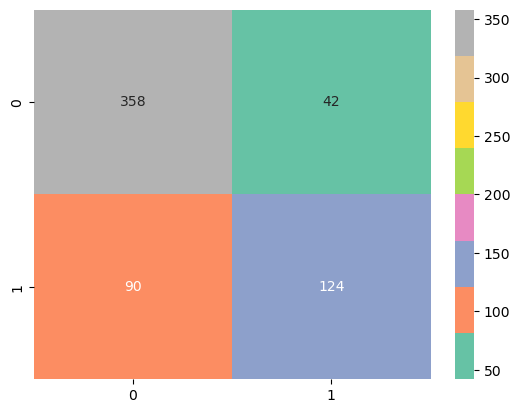

In [21]:
#training data accuracy 

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
con = confusion_matrix(Y_train, train_prediction)
sns.heatmap(con, annot=True, fmt='d',cmap="Set2")
print("Precision score of training set:", precision_score(Y_train, train_prediction))
print("Recall score of training set:",recall_score(Y_train, train_prediction))
print("F1 score of training set:",f1_score(Y_train, train_prediction))

In [22]:
#testing data

test_prediction=lr.predict(X_test)
acc = accuracy_score(Y_test, test_prediction)
print("Accuracy score of testing set :", round(np.mean(acc)*100, 2))


Accuracy score of testing set : 75.97


Precision score of testing set: 0.717948717948718
Recall score of testing set: 0.5185185185185185
F1 score of testing set: 0.6021505376344086


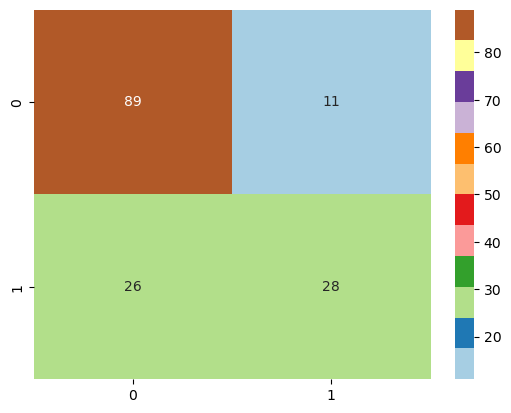

In [23]:
#test data accuracy

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
con = confusion_matrix(Y_test, test_prediction)
sns.heatmap(con, annot=True, fmt='d', cmap="Paired")
print("Precision score of testing set:",precision_score(Y_test, test_prediction))
print("Recall score of testing set:",recall_score(Y_test, test_prediction))
print("F1 score of testing set:",f1_score(Y_test, test_prediction))


In [24]:
#Making a predictive system
input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)

#input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm.predict(std_data)
print(prediction)

if(prediction[0] == 0):
    print('The Person is not diabetic')
else:
    print('The Person is diabetic')


[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
The Person is diabetic


C:\Users\laksh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
#saving the trained model

import pickle

In [27]:
filename = 'trained_model.sav'
pickle.dump(svm, open(filename, 'wb'))

In [28]:
#loading the saved model

loaded_model = pickle.load(open('trained_model.sav','rb'))

In [29]:
input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)

#input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')



                                       


[1]
The person is diabetic
